# AmadeusGPT Demo: MausHaus

- please get an openAI user key: https://platform.openai.com/api-keys.
- We suggest to run the demos locally, but it can be viewed on Google Colab. Some interactive features might not be available.

In [ ]:
!pip install --pre amadeusgpt

- Let's test that your open AI API Key works:

In [3]:
mykey = "your-key-here"

In [5]:
import os
if 'OPENAI_API_KEY' not in os.environ:
     os.environ['OPENAI_API_KEY'] = mykey

In [6]:
from openai import OpenAI

client = OpenAI(api_key=mykey)

response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role": "user", "content": "Hello"}]
)
print(response.choices[0].message.content)

Hello! How can I assist you today?


In [7]:
import matplotlib
%matplotlib widget
from amadeusgpt import AMADEUS
import amadeusgpt
from pathlib import Path
from amadeusgpt.utils import parse_result
from amadeusgpt import create_project

## Please upload the demo video and associated files:
- you can grab it from here: https://github.com/AdaptiveMotorControlLab/AmadeusGPT/tree/mwm/docs/examples/MausHaus

In [8]:
scene_frame_number = 400
amadeus_root = Path(amadeusgpt.__file__).parent.parent

kwargs = {
    "keypoint_info.body_orientation_keypoints.neck" : "nose",
    "keypoint_info.body_orientation_keypoints.tail_base" : "tail_base",
    "keypoint_info.body_orientation_keypoints.animal_center" : "neck",
    "keypoint_info.head_orientation_keypoints.nose" : "nose",
    "keypoint_info.head_orientation_keypoints.neck" : "neck",
    "video_info.scene_frame_number" : 100,
}

config = create_project(data_folder = "../examples/MausHaus", #check the path to the data folder
                        result_folder = "results",
                        **kwargs
                        )

amadeus = AMADEUS(config, use_vlm = True)
video_file_paths = amadeus.get_video_file_paths()
print (video_file_paths)   

Project created at results. Results will be saved to results
The project will load video files (*.mp4) and optionally keypoint files from ../examples/MausHaus
A copy of the project config file is saved at results/config.yaml
{'data_info': {'data_folder': '../examples/MausHaus',
               'result_folder': 'results',
               'video_suffix': '.mp4'},
 'keypoint_info': {'body_orientation_keypoints': {'animal_center': 'neck',
                                                  'neck': 'nose',
                                                  'tail_base': 'tail_base'},
                   'head_orientation_keypoints': {'neck': 'neck',
                                                  'nose': 'nose'},
                   'include_confidence': False,
                   'use_3d': False},
 'llm_info': {'gpt_model': 'gpt-4o',
              'keep_last_n_messages': 2,
              'max_tokens': 4096,
              'temperature': 0.0},
 'object_info': {'load_objects_from_disk': False, 'use_

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0075 $
current input tokens 948
current accumulated tokens 1134
description of the image frame provided
The image shows a top view of a small enclosure with bedding material. There are various objects inside, including a circular dish and some other small items. There is a cluster of colored dots in one area, which likely indicates the presence of an animal, possibly a mouse.

- **Description**: Top view of an enclosure with bedding and various objects, including a circular dish. Colored dots suggest the presence of an animal.
- **Individuals**: 1
- **Species**: topview_mouse
- **Background_objects**: circular dish, bedding, small items

```json
{
    "description": "Top view of an enclosure with bedding and various objects, including a circular dish. Colored dots suggest the presence of an animal.",
    "individuals": 1,
    "species": "topview_mouse",
    "background_objects": ["circular dish", "bedding", "small items"]
}
```
['../examples/MausHaus/maushaus_trimm

## Draw two ROIs by drawing 
- Run the cell below, then click points to make a rectangle, for example, or another shape. Hit ESC when done!
- Then we will ask Q's about what the mouse does...

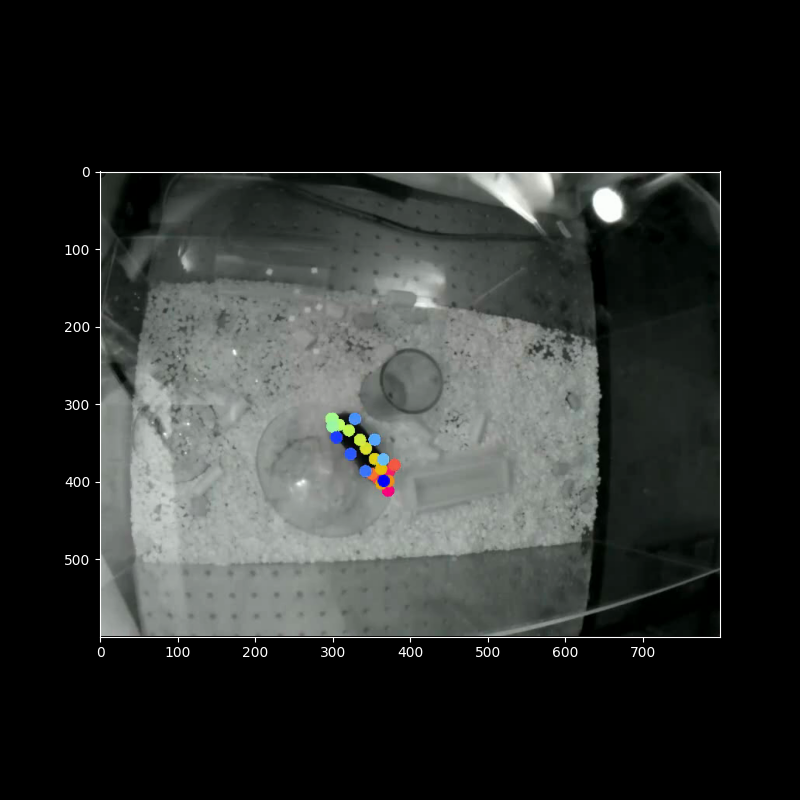

In [14]:
behavior_analysis = amadeus.get_behavior_analysis(video_file_path='../examples/MausHaus/maushaus_trimmed.mp4', #check the path to the video file
                                                  keypoint_file_path='../examples/MausHaus/maushaus_trimmed.h5') #check the path to the keypoint file

behavior_analysis.gui_manager.add_roi_from_video_selection()

### Press Esc when you are done drawing each ROI!!

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


doing active forgetting


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0763 $
current input tokens 3065
current accumulated tokens 13582


To plot the trajectory of the animal using the animal center and color it by time, we can use the 'mouse_center' keypoint. We will retrieve the keypoints data, extract the 'mouse_center' coordinates, and then plot the trajectory with a color gradient representing time.

Here is the code to achieve this:

```python
def plot_trajectory_colored_by_time(identifier):
    '''
    Parameters:
    ----------
    identifier: Identifier. Contains information about the video, keypoint and config
    '''
    # create_analysis returns an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(identifier)
    
    # Get keypoints data
    keypoints = analysis.get_keypoints()  # shape (n_frames, n_individuals, n_kpts, n_dims)
    
    # Get the index of 'mouse_center' keypoint
    keypoint_names = analysis.get_keypoint_names()
    mouse_center_index = keypoint_names.index('mouse_center')
    
    # Extract 'mouse_center' coordinates for the animal
    mouse_center_coords = keypoints[:, 0, mouse_center_index, :]  # shape (n_frames, n_dims)
    
    # Create a color map based on time
    n_frames = mouse_center_coords.shape[0]
    colors = plt.cm.viridis(np.linspace(0, 1, n_frames))
    
    # Plot the trajectory
    fig, ax = plt.subplots()
    ax.scatter(mouse_center_coords[:, 0], mouse_center_coords[:, 1], c=colors, s=2)
    
    # Overlay the trajectory on the scene image
    ax.set_xlim(0, 800)  # xlim covers the whole image width
    ax.set_ylim(0, 600)  # ylim covers the whole image height
    ax.invert_yaxis()  # Invert y-axis to match image coordinates
    
    return fig, ax
```

This code will plot the trajectory of the animal's 'mouse_center' keypoint, with the color of the trajectory changing over time. The plot is overlaid on the scene image, with the y-axis inverted to match the image coordinates.

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

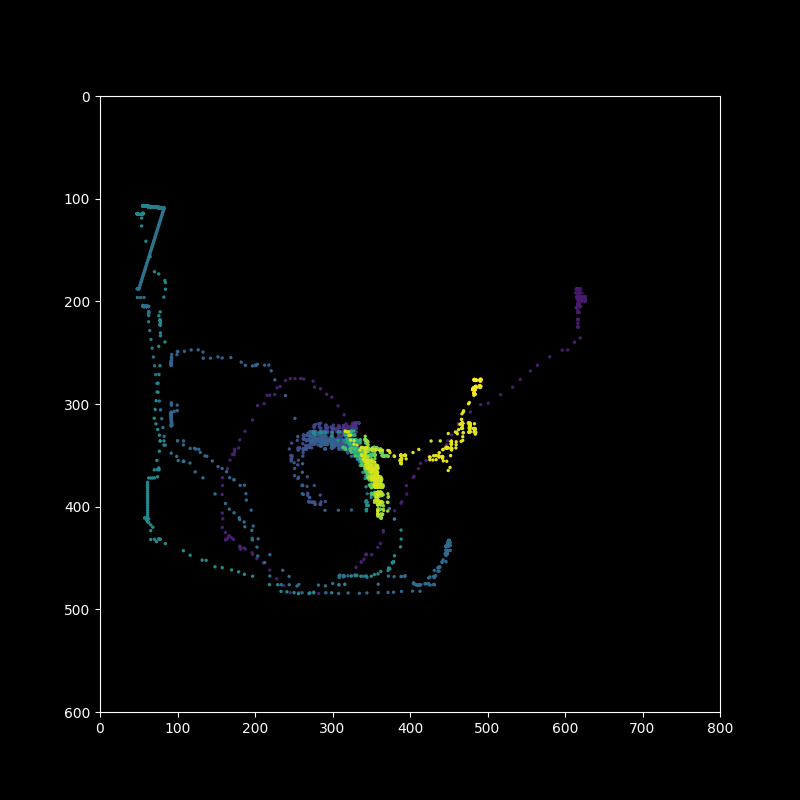

In [15]:
query = "Plot the trajectory of the animal using the animal center and color it by time"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

In [16]:
query = "When does the mouse move from ROI0 to ROI1?"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


doing active forgetting


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0984 $
current input tokens 3249
current accumulated tokens 17221


To determine when the mouse moves from ROI0 to ROI1, we need to capture events where the mouse is in ROI0 and then subsequently in ROI1. We can use the `get_animals_object_events` function to capture these events for each ROI and then use `get_composite_events` with the 'sequential' composition type to find when the mouse moves from ROI0 to ROI1.

Here is the code to achieve this:

```python
def get_movement_from_ROI0_to_ROI1_events(identifier):
    '''
    Parameters:
    ----------
    identifier: Identifier. Contains information about the video, keypoint and config
    '''
    # create_analysis returns an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(identifier)
    
    # Get events where the mouse is in ROI0
    roi0_events = analysis.get_animals_object_events(object_name='ROI0', query='overlap==True', negate=False, bodypart_names=None, min_window=10, max_window=1000000)
    
    # Get events where the mouse is in ROI1
    roi1_events = analysis.get_animals_object_events(object_name='ROI1', query='overlap==True', negate=False, bodypart_names=None, min_window=10, max_window=1000000)
    
    # Find events where the mouse moves from ROI0 to ROI1
    movement_events = analysis.get_composite_events(events_A=roi0_events, events_B=roi1_events, composition_type='sequential', max_interval_between_sequential_events=15, min_window=10, max_window=1000000)
    
    return movement_events
```

This code will return a list of events where the mouse moves from ROI0 to ROI1. The `get_composite_events` function is used with the 'sequential' composition type to ensure that the movement from ROI0 to ROI1 is captured.

### For a sequential event such as moving from ROI0 to ROI1, you will perhaps need to describe the interval between two events. If you got empty events above, try this below

In [17]:
query = "When does the mouse move from ROI0 to ROI1. The interval should be less than 100 frames"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


doing active forgetting


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.1201 $
current input tokens 3206
current accumulated tokens 20802


To determine when the mouse moves from ROI0 to ROI1 with an interval of less than 100 frames, we can use the `get_composite_events` function with the 'sequential' composition type and set the `max_interval_between_sequential_events` parameter to 100. This will ensure that we only capture events where the transition from ROI0 to ROI1 occurs within 100 frames.

Here is the code to achieve this:

```python
def get_movement_from_ROI0_to_ROI1_within_100_frames(identifier):
    '''
    Parameters:
    ----------
    identifier: Identifier. Contains information about the video, keypoint and config
    '''
    # create_analysis returns an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(identifier)
    
    # Get events where the mouse is in ROI0
    roi0_events = analysis.get_animals_object_events(object_name='ROI0', query='overlap==True', negate=False, bodypart_names=None, min_window=10, max_window=1000000)
    
    # Get events where the mouse is in ROI1
    roi1_events = analysis.get_animals_object_events(object_name='ROI1', query='overlap==True', negate=False, bodypart_names=None, min_window=10, max_window=1000000)
    
    # Find events where the mouse moves from ROI0 to ROI1 within 100 frames
    movement_events = analysis.get_composite_events(events_A=roi0_events, events_B=roi1_events, composition_type='sequential', max_interval_between_sequential_events=100, min_window=10, max_window=1000000)
    
    return movement_events
```

This code will return a list of events where the mouse moves from ROI0 to ROI1, ensuring that the transition occurs within 100 frames.

### You can get a list of binary masks (equivalent to ethogram) for the underlying behavior, if your query is about retriving a described behavior

In [18]:
# the return masks is of shape (num_of_events, video_length)
# where each boolean array of (video_length,) is binary where True indicates whether the behavior is happening at that frame
masks = qa_message.get_masks()
print (masks)

{<amadeusgpt.behavior_analysis.identifier.Identifier object at 0x32b9344d0>: None}
